In [1]:
# project: p9

In [2]:
import csv
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline

In [3]:
# Reusing some of the functions from the previous projects
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

def get_mapping(path):
    """
    Converts mapping csv list of lists data into a dict with keys as IDs and values as names.
    """
    path_csv = process_csv(path)
    path_dict = dict()
    for row in path_csv:
        path_dict[row[0]] = row[1]
    return path_dict

def get_key_from_last_name(target_lastname):
    """
    Returns a list of keys (ids) of people that have the specified last name (case insensitive match) in your small mapping.
    Your code must only consider the keys that begin with "nm".
    """
    keys = []
    for row in small_mapping_dict:
        last_name = small_mapping_dict[row].split(" ")
        if "nm" in row and target_lastname.lower() in last_name[-1].lower():
            #print(small_mapping_dict[row])
            keys.append(row)
            
    return keys

def get_raw_movies(path):
    """
    Converts movies csv list of lists data into a dict with keys as column names and values as corresponding type converted values.
    """

    path_csv = process_csv(path)
    csv_header = path_csv[0]
    csv_data = path_csv[1:]
    int_list = ["year", "duration"]
    float_list = ["rating"]
    list_list = ["genres", "actors", "directors"]
    
    path_list = []
    
    for row in csv_data:
        path_dict = dict()
        for i in range(len(csv_header)):
            if csv_header[i] in int_list:
                path_dict[csv_header[i]] = int(row[i])
            elif csv_header[i] in float_list:
                path_dict[csv_header[i]] = float(row[i])
            elif csv_header[i] in list_list:
                path_dict[csv_header[i]] = row[i].split(", ")
            else:
                path_dict[csv_header[i]] = row[i]
            #print(row[i])
        #print()
        path_list.append(path_dict)
        
    return path_list

def get_movies(movies_path, mapping_path):
    """
    Creates a new movies list of dict data by using the mapping dictionary,
    to convert IDs into actual names for title, actors, and directors.
    """
    movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
        
    for row in movies:
        
        if row["title"] in mapping:
            row["title"] = mapping[row["title"]]
            
        director_list = []
        for director in row["directors"]:
            if director in mapping:
                director_list.append(mapping[director])
        row["directors"] = director_list
        
        actor_list = []
        for actor in row["actors"]:
            if actor in mapping:
                actor_list.append(mapping[actor])
        row["actors"] = actor_list

    return movies

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    
def median(items):
    lista = sorted(items)
    if len(lista) % 2 != 0:
        return lista[len(lista)//2]
    else: 
        idx = len(lista)//2
        return (lista[idx] + lista[idx - 1])/2
    
def year_to_decade(year):
    if year % 10 == 0:
        return str(year - 9) + " to " + str(year)
    else:
        decade_start = year - (year % 10) + 1
        return str(decade_start) + " to " + str(decade_start + 9)
        

In [4]:
def find_specific_movies(movies, keyword):
    '''given a list of movie dictionaries and a keyword,
    returns a list of movies that contains the keyword'''
    movies_new = list()
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['actors']):
            movies_new.append(movie)
    return movies_new            


In [5]:
movies = get_movies("movies.csv", "mapping.csv")
movies

[{'title': 'They Live',
  'year': 1988,
  'genres': ['Action', 'Horror', 'Sci-Fi'],
  'duration': 94,
  'directors': ['John Carpenter'],
  'actors': ['Roddy Piper', 'Keith David', 'Meg Foster'],
  'rating': 7.3},
 {'title': 'Beyond Justice',
  'year': 2014,
  'genres': ['Crime', 'Thriller'],
  'duration': 86,
  'directors': ['Timothy Woodward Jr.'],
  'actors': ['Vinnie Jones', 'Mischa Barton'],
  'rating': 3.4},
 {'title': 'Dirty Beautiful',
  'year': 2015,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 95,
  'directors': ['Tim Bartell'],
  'actors': ['Ricky Mabe', 'Jordan Monaghan', 'Conor Leslie', 'Darin Heames'],
  'rating': 5.5},
 {'title': 'American Milkshake',
  'year': 2013,
  'genres': ['Comedy'],
  'duration': 83,
  'directors': ['David Andalman', 'Mariko Munro'],
  'actors': ['Leo Fitzpatrick', 'Tyler Ross', 'Shareeka Epps'],
  'rating': 4.7},
 {'title': 'Honeydripper',
  'year': 2007,
  'genres': ['Crime', 'Drama', 'History'],
  'duration': 124,
  'directors': ['

In [6]:
#Q1: What is the average rating of the 'Harry Potter' movies directed by 'David Yates'?
movies_HP = find_specific_movies(find_specific_movies(movies, 'David Yates'), 'Harry Potter')
sum([m['rating'] for m in movies_HP])/len(movies_HP)

7.725

In [7]:
#Q2: What is the median rating of all 'Ice Age' movies?
movies_HP = find_specific_movies(movies, 'Ice Age')
median([m['rating'] for m in movies_HP])

6.8

In [8]:
def minimum(lista):
    
    min_num = None
    
    for i in lista:
        if min_num == None or i < min_num:
            min_num = i
    return min_num

In [9]:
#Q3: What are all the movies that have the lowest rating?
min_rating = minimum([m['rating'] for m in movies])

[m for m in movies if m['rating'] == min_rating]

[{'title': 'Proud American',
  'year': 2008,
  'genres': ['Drama'],
  'duration': 115,
  'directors': ['Fred Ashman'],
  'actors': ['Michael G. Davis',
   'Cecelia Antoinette',
   'Marie Antoinette',
   'Michelle Ashman'],
  'rating': 1.1},
 {'title': 'Troy: The Resurrection of Aeneas',
  'year': 2018,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 60,
  'directors': ['Aeneas Middleton'],
  'actors': ['Aeneas Middleton', 'Hardley Davidson'],
  'rating': 1.1},
 {'title': 'Browncoats: Independence War',
  'year': 2015,
  'genres': ['Action', 'Sci-Fi', 'War'],
  'duration': 98,
  'directors': ['Francis Hamada'],
  'actors': ['Beth Bemis',
   'Richard Martinsen',
   'Will James Johnson',
   'Nathan Cosmo Rahn'],
  'rating': 1.1},
 {'title': 'The Time Machine (I Found at a Yardsale)',
  'year': 2011,
  'genres': ['Sci-Fi'],
  'duration': 84,
  'directors': ['Steven A. Sandt'],
  'actors': ['George Abdelmalak', 'Steven Ronald Brattman', 'Elise Caloca'],
  'rating': 1.1},
 {'

In [10]:
def maximum(lista):
    max_num = None
    for i in lista:
        if max_num == None or i > max_num:
            max_num = i
    return max_num

In [11]:
def max_rated_movies(movie_list):
    """
    Input: A list of movies.
    Return: A list of highest rated movies among the input list.
    """
    max_rating  = maximum([m['rating'] for m in movie_list])
    max_movies = [m for m in movie_list if m['rating'] == max_rating]
    
    return max_movies

In [12]:
#Q4: Among all the 'Avengers' movies, which ones are highest rated?
avengers_movies = find_specific_movies(movies, 'Avengers')
max_rated_movies(avengers_movies)

[{'title': 'Avengers: Infinity War',
  'year': 2018,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 149,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'actors': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans',
   'Scarlett Johansson'],
  'rating': 8.4},
 {'title': 'Avengers: Endgame',
  'year': 2019,
  'genres': ['Action', 'Adventure', 'Drama'],
  'duration': 181,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'actors': ['Robert Downey Jr.',
   'Chris Evans',
   'Mark Ruffalo',
   'Chris Hemsworth',
   'Scarlett Johansson'],
  'rating': 8.4}]

In [13]:
def bucketize(movies, key):

    directors_dict = {}

    for movie in movies: 
        if type(movie[key]) == list:
            for val in movie[key]:
                if val not in directors_dict:
                    directors_dict[val] = []
                directors_dict[val].append(movie)
        else: 
            if movie[key] not in directors_dict:
                    directors_dict[movie[key]] = []
            directors_dict[movie[key]].append(movie)
    return directors_dict

In [14]:
# Buceketize the full list of movies by their actors.
actors_buckets = bucketize(movies, "actors")
# Buceketize the full list of movies by their directors.
directors_buckets = bucketize(movies, "directors")
# Buceketize the full list of movies by their genre.
genre_buckets = bucketize(movies, "genres")
# Buceketize the full list of movies by their year.
year_buckets = bucketize(movies, "year")

In [15]:
#Q5: Which movies did 'Octavia Spencer' act in?
actors_buckets['Octavia Spencer']

[{'title': 'A Kid Like Jake',
  'year': 2018,
  'genres': ['Drama', 'Family'],
  'duration': 92,
  'directors': ['Silas Howard'],
  'actors': ['Claire Danes',
   'Jim Parsons',
   'Octavia Spencer',
   'Priyanka Chopra'],
  'rating': 5.4},
 {'title': 'Hidden Figures',
  'year': 2016,
  'genres': ['Biography', 'Drama', 'History'],
  'duration': 127,
  'directors': ['Theodore Melfi'],
  'actors': ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe'],
  'rating': 7.8},
 {'title': 'The Shape of Water',
  'year': 2017,
  'genres': ['Adventure', 'Drama', 'Fantasy'],
  'duration': 123,
  'directors': ['Guillermo del Toro'],
  'actors': ['Sally Hawkins',
   'Michael Shannon',
   'Richard Jenkins',
   'Octavia Spencer'],
  'rating': 7.3},
 {'title': 'Car Dogs',
  'year': 2016,
  'genres': ['Comedy', 'Drama'],
  'duration': 104,
  'directors': ['Adam Collis'],
  'actors': ['Octavia Spencer',
   'Alessandra Torresani',
   'Patrick J. Adams',
   'Nia Vardalos'],
  'rating': 5.0},
 {'title': 'Sm

In [16]:
#Q6: Which movies did 'George Takei' act in.
actors_buckets['George Takei']

[{'title': 'Ninja Cheerleaders',
  'year': 2008,
  'genres': ['Action', 'Comedy'],
  'duration': 81,
  'directors': ['David Presley'],
  'actors': ['Trishelle Cannatella',
   'Ginny Weirick',
   'Maitland McConnell',
   'George Takei'],
  'rating': 3.3},
 {'title': 'Live by the Fist',
  'year': 1993,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 77,
  'directors': ['Cirio H. Santiago'],
  'actors': ['Jerry Trimble', 'George Takei', 'Ted Markland'],
  'rating': 4.3},
 {'title': 'Free Birds',
  'year': 2013,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 91,
  'directors': ['Jimmy Hayward'],
  'actors': ['Owen Wilson', 'Woody Harrelson', 'Amy Poehler', 'George Takei'],
  'rating': 5.8}]

In [24]:
#Q7: How many movies are in each genre?
movies_by_genre = {g:len(genre_buckets[g]) for g in genre_buckets}
movies_by_genre

{'Action': 5611,
 'Horror': 5175,
 'Sci-Fi': 2148,
 'Crime': 5078,
 'Thriller': 5340,
 'Comedy': 11130,
 'Drama': 16410,
 'Romance': 5753,
 'History': 627,
 'Adventure': 3849,
 'Western': 1177,
 'Family': 1585,
 'Fantasy': 1537,
 'War': 779,
 'Sport': 565,
 'Biography': 1009,
 'Mystery': 2479,
 'Film-Noir': 647,
 'Music': 908,
 'Animation': 676,
 'Musical': 941,
 'Reality-TV': 1,
 'Documentary': 1,
 'News': 1}

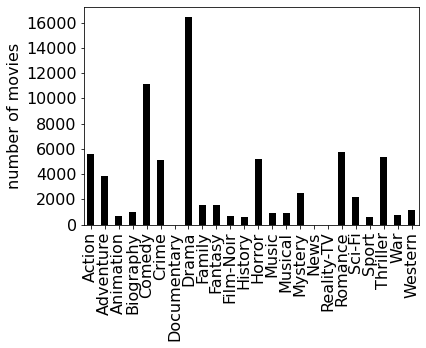

In [28]:
#Q8: Plot the number of movies in each genre as a bar graph.
plot_dict(movies_by_genre, "number of movies")

# some of the genders appear to not have movies because in comparison with the others they have very few
# and as the graphic is small, they are not showing#Q9: Find the number of movies released in each decade.

In [31]:
#Q9: Find the number of movies released in each decade.
decade_dict = {}
for y in year_buckets:
    decade = year_to_decade(y)
    if decade not in decade_dict:
        decade_dict[decade] = 0
    decade_dict[decade] += len(year_buckets[y])
    
decade_dict

{'1981 to 1990': 2840,
 '2011 to 2020': 8884,
 '2001 to 2010': 6271,
 '1941 to 1950': 2256,
 '1971 to 1980': 1889,
 '1951 to 1960': 2201,
 '1931 to 1940': 2256,
 '1961 to 1970': 1609,
 '1991 to 2000': 4280,
 '1911 to 1920': 120,
 '1921 to 1930': 496}

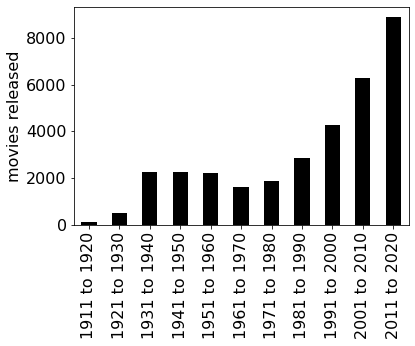

In [34]:
#Q10: Plot the number of movies released in each decade as a bar graph.
plot_dict(decade_dict, "movies released")

# We see a decline in the 70s. What happened here probably is Vietnam war and the energy crisis in the 70's

In [38]:
#Q11: Find the highest rated movies for each genre.
dict_max = {m:max_rated_movies(genre_buckets[m]) for m in genre_buckets}
dict_max

{'Action': [{'title': 'The Dark Knight',
   'year': 2008,
   'genres': ['Action', 'Crime', 'Drama'],
   'duration': 152,
   'directors': ['Christopher Nolan'],
   'actors': ['Christian Bale',
    'Heath Ledger',
    'Aaron Eckhart',
    'Michael Caine'],
   'rating': 9.0}],
 'Horror': [{'title': 'Psycho',
   'year': 1960,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'duration': 109,
   'directors': ['Alfred Hitchcock'],
   'actors': ['Anthony Perkins', 'Vera Miles', 'John Gavin'],
   'rating': 8.5}],
 'Sci-Fi': [{'title': 'Inception',
   'year': 2010,
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'duration': 148,
   'directors': ['Christopher Nolan'],
   'actors': ['Leonardo DiCaprio',
    'Joseph Gordon-Levitt',
    'Ellen Page',
    'Tom Hardy'],
   'rating': 8.8}],
 'Crime': [{'title': 'The Godfather',
   'year': 1972,
   'genres': ['Crime', 'Drama'],
   'duration': 175,
   'directors': ['Francis Ford Coppola'],
   'actors': ['Marlon Brando', 'Al Pacino'],
   'rating': 9.

In [39]:
#Q12: Find the median rating of movies from each genre.
median_dict = {}
for g in genre_buckets: 
    med = median([m['rating'] for m in genre_buckets[g]])
    median_dict[g] = med
median_dict

{'Action': 5.5,
 'Horror': 4.6,
 'Sci-Fi': 4.9,
 'Crime': 6.0,
 'Thriller': 5.1,
 'Comedy': 5.9,
 'Drama': 6.1,
 'Romance': 6.2,
 'History': 6.5,
 'Adventure': 6.0,
 'Western': 6.2,
 'Family': 5.9,
 'Fantasy': 5.7,
 'War': 6.4,
 'Sport': 6.1,
 'Biography': 6.7,
 'Mystery': 5.8,
 'Film-Noir': 6.6,
 'Music': 6.2,
 'Animation': 6.4,
 'Musical': 6.2,
 'Reality-TV': 2.1,
 'Documentary': 7.5,
 'News': 6.4}

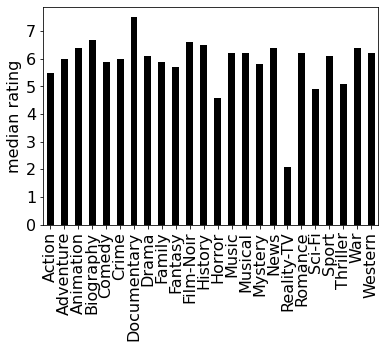

In [40]:
#Q13: Plot the median ratings of movies in each genre as a bar graph.
plot_dict(median_dict, "median rating")

# Reality-TV is often seen as bad media rather than documentaries that are more valuable intellectually for people
# in general

In [50]:
median_sorted = dict(sorted(median_dict.items(), key = lambda k:k[-1], reverse = True))
median_sorted

{'Documentary': 7.5,
 'Biography': 6.7,
 'Film-Noir': 6.6,
 'History': 6.5,
 'War': 6.4,
 'Animation': 6.4,
 'News': 6.4,
 'Romance': 6.2,
 'Western': 6.2,
 'Music': 6.2,
 'Musical': 6.2,
 'Drama': 6.1,
 'Sport': 6.1,
 'Crime': 6.0,
 'Adventure': 6.0,
 'Comedy': 5.9,
 'Family': 5.9,
 'Mystery': 5.8,
 'Fantasy': 5.7,
 'Action': 5.5,
 'Thriller': 5.1,
 'Sci-Fi': 4.9,
 'Horror': 4.6,
 'Reality-TV': 2.1}

In [51]:
#Q14: Produce a list of genres sorted in decreasing order of their median rating.
list(median_sorted.keys())

['Documentary',
 'Biography',
 'Film-Noir',
 'History',
 'War',
 'Animation',
 'News',
 'Romance',
 'Western',
 'Music',
 'Musical',
 'Drama',
 'Sport',
 'Crime',
 'Adventure',
 'Comedy',
 'Family',
 'Mystery',
 'Fantasy',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Horror',
 'Reality-TV']

In [55]:
#Q15: Produce a list of Shrek movies sorted in increasing order of their year of release.
sorted(find_specific_movies(movies,'Shrek'), key = lambda k:k['year'])

[{'title': 'Shrek',
  'year': 2001,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 90,
  'directors': ['Andrew Adamson', 'Vicky Jenson'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.8},
 {'title': 'Shrek 2',
  'year': 2004,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Andrew Adamson', 'Kelly Asbury'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.2},
 {'title': 'Shrek the Third',
  'year': 2007,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Chris Miller', 'Raman Hui'],
  'actors': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas'],
  'rating': 6.1},
 {'title': 'Shrek Forever After',
  'year': 2010,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Mike Mitchell'],
  'actors': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas'],
  'rating': 6.3},
 {'title': 'Shrek the Musical',
  'year': 2013,
  'genre

In [61]:
#Q16: Find a list of all movies in which 'Jodie Foster' is both an actor and director.
jf_actor = actors_buckets['Jodie Foster']
jf_director = directors_buckets['Jodie Foster']

[i for i in jf_actor if i in jf_director]

[{'title': 'Little Man Tate',
  'year': 1991,
  'genres': ['Drama'],
  'duration': 99,
  'directors': ['Jodie Foster'],
  'actors': ['Jodie Foster', 'Alex Lee', 'Adam Hann-Byrd'],
  'rating': 6.6}]

In [73]:
#Q17: What is the title of the longest movie both acted and directed by 'Clint Eastwood'?
list_ce = [i for i in actors_buckets['Clint Eastwood'] if i in directors_buckets['Clint Eastwood']]

max_title = None
max_dur = None

for m in list_ce:
    if max_title == None or m['duration'] > max_dur:
        max_title = m['title']
        max_dur = m['duration']
max_title 

'A Perfect World'

In [82]:
#Q18: What are the titles of the movies directed by the Wachowskis contain both 'Action' and 'Adventure' in their genre?

list_w = [i for i in directors_buckets['Lana Wachowski'] if i in directors_buckets['Lilly Wachowski']]
list_w_a = [i for i in genre_buckets['Action'] if i in list_w]
list_w_aa = [i['title'] for i in genre_buckets['Adventure'] if i in list_w_a]
list_w_aa

['Jupiter Ascending', 'Speed Racer']

In [91]:
#Q19: Find the titles of the 15 shortest Biographies in the dataset.
sorted_list = sorted(genre_buckets['Biography'], key = lambda k:k['duration'])
[i['title'] for i in sorted_list[0:15]]

['Hibakusha',
 'King Candy',
 'Amy Winehouse: Fallen Star',
 'Steve Jobs: Visionary Genius',
 'The Road to Hollywood',
 'Danny Greene: The Rise and Fall of the Irishman',
 'From the Manger to the Cross; or, Jesus of Nazareth',
 'Joseph Smith: Prophet of the Restoration',
 'The Trade',
 'Blondes at Work',
 'Spirit of Youth',
 'The Loves of Edgar Allan Poe',
 'Alexander Hamilton',
 'Dillinger',
 'Memoria']

In [104]:
#Q20: Find the top 25 actors with the highest median rating among those actors who have acted in at least 15 movies.
rem_actors = {a:actors_buckets[a] for a in actors_buckets if len(actors_buckets[a]) >= 15}

median_dict_a = {}
for g in rem_actors: 
    med = median([m['rating'] for m in rem_actors[g]])
    median_dict_a[g] = med
    
sorted_act = sorted(median_dict_a.items(), key = lambda k:k[-1], reverse = True)
[i for i in dict(sorted_act[0:25])]

['Audrey Hepburn',
 'Leonardo DiCaprio',
 'Woody Allen',
 'Ryan Gosling',
 'Harold Lloyd',
 'Brad Pitt',
 'Philip Seymour Hoffman',
 'Ralph Fiennes',
 'Laurence Olivier',
 'Groucho Marx',
 'Humphrey Bogart',
 'Amy Adams',
 'Jake Gyllenhaal',
 'Judy Garland',
 'Bette Davis',
 'Albert Brooks',
 'Bill Murray',
 'Russell Crowe',
 'Christian Bale',
 'Buster Keaton',
 'Tom Cruise',
 'Fred Astaire',
 'Chris Cooper',
 'Matt Damon',
 'Donald Crisp']